In [1]:
from Linear_regression import MatrixLinearRegression, LinearRegressionGD
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
X, y = make_regression(n_samples=1000, n_features=1, noise=150, random_state=42)

X_train, y_train = X[:800],y[:800]
X_test, y_test = X[800:], y[800:]

In [3]:
my_lin_reg = MatrixLinearRegression()
my_lin_reg.fit(X_train, y_train)
y_pred = my_lin_reg.predict(X_test)

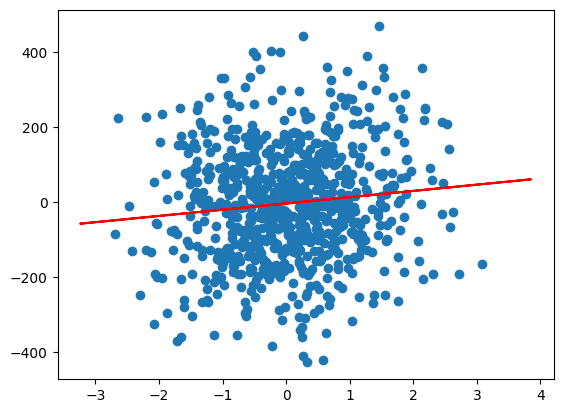

In [4]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')

In [5]:
my_lin_reg_gd = LinearRegressionGD(lr=0.03)
my_lin_reg_gd.fit(X_train, y_train)
y_pred = my_lin_reg_gd.predict(X_test)

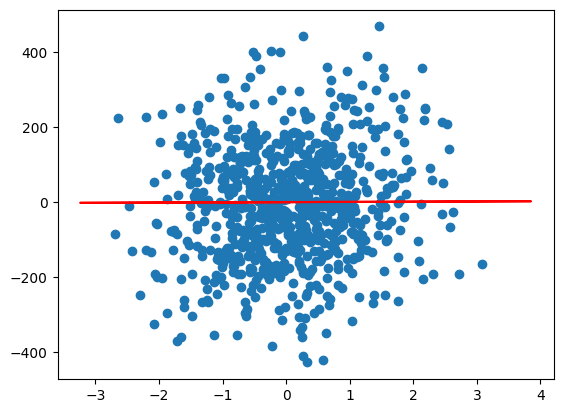

In [6]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')